In [1]:
# import library for data cleaning 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# import library for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import library for modeling
import scipy.stats
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor

# import library for Cross Validation 
from sklearn.model_selection import KFold # for regression
from sklearn.model_selection import StratifiedKFold # for classificaion
from sklearn.model_selection import cross_val_score

# import library for train/test split
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

# Data Cleaning 

## Training Data Exploration

In [2]:
train_data = pd.read_csv('option_train.csv')
train_data

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,Under
1,0.125000,427.015526,465.0,0.166667,0.03126,Over
2,20.691244,427.762336,415.0,0.265873,0.03116,Under
3,1.035002,451.711658,460.0,0.063492,0.02972,Over
4,39.553020,446.718974,410.0,0.166667,0.02962,Under
...,...,...,...,...,...,...
1675,1.470000,444.397163,475.0,0.273810,0.03034,Over
1676,34.927317,438.453825,410.0,0.301587,0.02972,Under
1677,41.127997,428.042219,390.0,0.170635,0.03188,Under
1678,0.440003,439.081203,480.0,0.293651,0.02962,Over


- Value (C): Current option value      

- S: Current asset value

- K: Strike price of option

- r: Annual interest rate

- tau: Time to maturity (in years)

- BS: The Black-Scholes formula was applied to this data (using some 𝜎) to get C_pred. If an option has C_pred – C > 0, i.e., the prediction over estimated the option value, we associate that option by (Over); otherwise, we associate that option with (Under).

In [3]:
train_data.describe(include='all')

,Value,S,K,tau,r,BS
count,1678.000000,1679.000000,1678.000000,1679.000000,1680.000000,1680
unique,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,Under
freq,NaN,NaN,NaN,NaN,NaN,946
mean,15.068709,464.402535,438.241955,0.437519,0.030235,NaN
std,14.040023,973.652179,23.408989,7.057555,0.000557,NaN
min,0.125000,0.000000,375.000000,0.003968,0.029510,NaN
25%,2.255001,433.863864,420.000000,0.119048,0.029820,NaN
50%,11.190967,442.634081,440.000000,0.202381,0.030130,NaN
75%,25.747434,447.320414,455.000000,0.285714,0.030540,NaN


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   1678 non-null   float64
 1   S       1679 non-null   float64
 2   K       1678 non-null   float64
 3   tau     1679 non-null   float64
 4   r       1680 non-null   float64
 5   BS      1680 non-null   object 
dtypes: float64(5), object(1)
memory usage: 78.9+ KB


In [5]:
train_data.count()

Value    1678
S        1679
K        1678
tau      1679
r        1680
BS       1680
dtype: int64

In [6]:
numrecords = len(train_data)
numrecords

1680

## Check for missing and erroneous entries

### 'Value' in train_data (2 missing)

In [7]:
# # Value
# train_data['Value'].sort_values(ascending = False)

<AxesSubplot:xlabel='Value'>

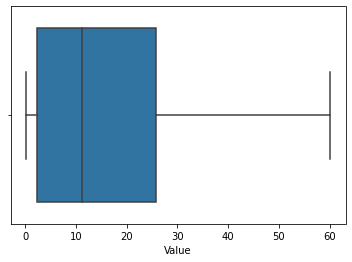

In [8]:
sns.boxplot(x='Value', data=train_data)

Text(0, 0.5, 'Count')

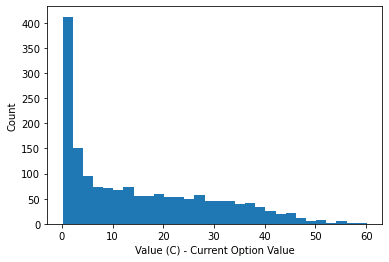

In [9]:
plt.hist(train_data['Value'], bins=30)
plt.xlabel('Value (C) - Current Option Value')
plt.ylabel('Count')

In [10]:
train_data['Value'].count()

1678

In [11]:
train_data['Value'].isnull().sum()

2

In [12]:
# # We use mean imputation technique to replace the missing value with the mean value of the entire Value column
# imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
# imp = imp.fit(train_data['Value'].values.reshape(-1,1))
# imputed_valueData = imp.transform(train_data['Value'].values.reshape(-1,1))
# imputed_valueData

In [13]:
# train_data['Value'] = imputed_valueData.flatten()

In [14]:
# train_data.describe(include = 'all')

In [15]:
# train_data['Value'].isnull().sum()

### 'S' in train_data (1 missing)

In [16]:
# len(train_data['Value'])
# Total numbers of value in S column
train_data['S'].count()

1679

In [17]:
# Number of missing value in S column
train_data['S'].isnull().sum()

1

In [18]:
# Minimum
train_data['S'].min()

0.0

In [19]:
# Maximum
train_data['S'].max()

40333.0

In [20]:
# train_data['S'].sort_values(ascending = False)

Text(0, 0.5, 'Count')

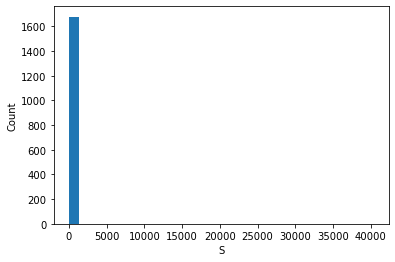

In [21]:
plt.hist(train_data['S'], bins=30)
plt.xlabel('S')
plt.ylabel('Count')

<AxesSubplot:xlabel='S'>

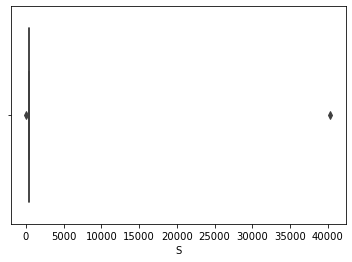

In [22]:
sns.boxplot(x='S', data=train_data)

In [23]:
train_data.drop(train_data[train_data['S'] > 40000].index , inplace=True)
train_data.drop(train_data[train_data['S'] == 0].index , inplace=True)

In [24]:
# train_data['S'].sort_values(ascending = True)

<AxesSubplot:xlabel='S'>

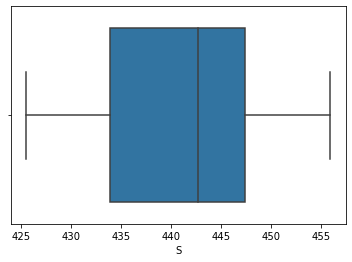

In [25]:
sns.boxplot(x='S', data=train_data)

Text(0, 0.5, 'Count')

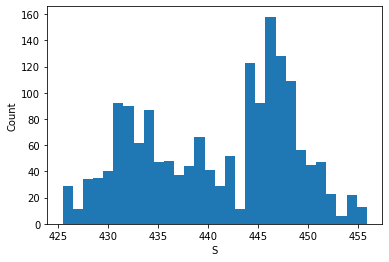

In [26]:
plt.hist(train_data['S'], bins=30)
plt.xlabel('S')
plt.ylabel('Count')

In [27]:
smin = train_data['S'].min()
smax = train_data['S'].max()

print('Min', smin, 'Max', smax)

Min 425.4723309 Max 455.8806188


In [28]:
# # Filling missing value using mean imputation
# imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
# imp = imp.fit(train_data['S'].values.reshape(-1,1))
# imputed_sData = imp.transform(train_data['S'].values.reshape(-1,1))
# imputed_sData

In [29]:
# imputed_sData.shape

In [30]:
# train_data['S'] = imputed_sData.flatten()

In [31]:
train_data['S'].isnull().sum()

1

In [32]:
train_data.count()

Value    1676
S        1677
K        1676
tau      1677
r        1678
BS       1678
dtype: int64

In [33]:
# train_data.describe(include = 'all')

### 'K' in train_data (2 missing)

In [34]:
# Total numbers of value in K column
train_data['K'].count()

1676

In [35]:
# Number of missing value in K column
train_data['K'].isnull().sum()

2

In [36]:
# imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
# imp = imp.fit(train_data['K'].values.reshape(-1,1))
# imputed_kData = imp.transform(train_data['K'].values.reshape(-1,1))
# imputed_kData

In [37]:
# train_data['K'] = imputed_kData.flatten()

In [38]:
train_data['K'].isnull().sum()

2

In [39]:
# train_data.count()

In [40]:
# train_data.describe(include = 'all')

### 'tau' in train_data (1 missing)

In [41]:
# Total numbers of value in tau column
train_data['tau'].count()

1677

In [42]:
# Number of missing value in tau column
train_data['tau'].isnull().sum()

1

Text(0, 0.5, 'Count')

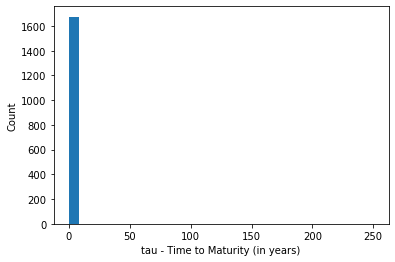

In [43]:
plt.hist(train_data['tau'], bins=30)
plt.xlabel('tau - Time to Maturity (in years)')
plt.ylabel('Count')

<AxesSubplot:xlabel='tau'>

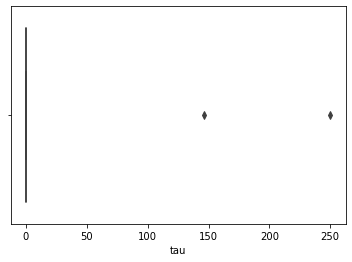

In [44]:
sns.boxplot(x='tau', data=train_data)

In [45]:
# train_data['tau'].sort_values(ascending = False)

In [46]:
train_data.drop(train_data[train_data['tau'] > 1].index , inplace=True)

In [47]:
# train_data['tau'].sort_values(ascending = False)

<AxesSubplot:xlabel='tau'>

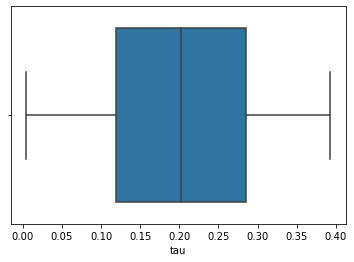

In [48]:
sns.boxplot(x='tau', data=train_data)

Text(0, 0.5, 'Count')

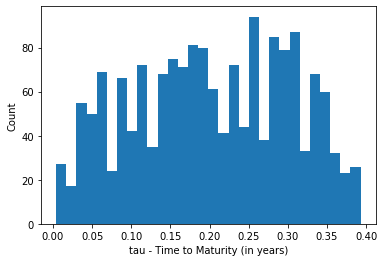

In [49]:
plt.hist(train_data['tau'], bins=30)
plt.xlabel('tau - Time to Maturity (in years)')
plt.ylabel('Count')

In [50]:
# imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
# imp = imp.fit(train_data['tau'].values.reshape(-1,1))
# imputed_tauData = imp.transform(train_data['tau'].values.reshape(-1,1))
# imputed_tauData

In [51]:
# train_data['tau'] = imputed_tauData.flatten()

In [52]:
# train_data['tau'].isnull().sum()

In [53]:
# train_data.count()

In [54]:
# train_data.describe(include = 'all')

### 'r' in train_data

In [55]:
# Total numbers of value in r column
train_data['r'].count()

1676

In [56]:
# Number of missing value in r column
train_data['r'].isnull().sum()

0

Text(0, 0.5, 'Count')

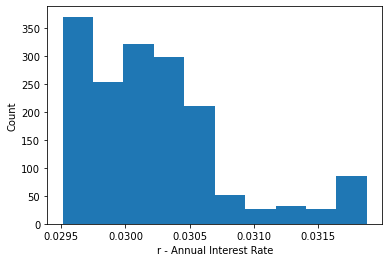

In [57]:
plt.hist(train_data['r'], bins=10)
plt.xlabel('r - Annual Interest Rate')
plt.ylabel('Count')

<AxesSubplot:xlabel='r'>

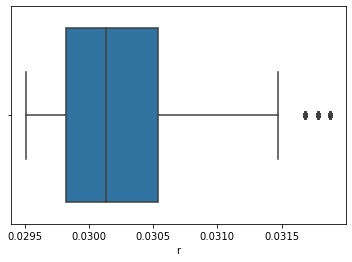

In [58]:
sns.boxplot(x='r', data=train_data)

In [59]:
# train_data['r'].sort_values(ascending = False)

In [60]:
# 86 records are larger than r=0.0315
sum(train_data['r'] >= 0.0315)

86

### 'BS' in train_data

In [61]:
# Total numbers of value in BS column
train_data['BS'].count()

1676

In [62]:
# Number of missing value in BS column
train_data['BS'].isnull().sum()

0

In [63]:
train_data['BS']

0       Under
1        Over
2       Under
3        Over
4       Under
        ...  
1675     Over
1676    Under
1677    Under
1678     Over
1679     Over
Name: BS, Length: 1676, dtype: object

In [64]:
train_data['BS'].unique() 

array(['Under', 'Over'], dtype=object)

In [65]:
train_data.replace({'Under': 0, 'Over': 1}, inplace=True)

In [66]:
train_data

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,0
1,0.125000,427.015526,465.0,0.166667,0.03126,1
2,20.691244,427.762336,415.0,0.265873,0.03116,0
3,1.035002,451.711658,460.0,0.063492,0.02972,1
4,39.553020,446.718974,410.0,0.166667,0.02962,0
...,...,...,...,...,...,...
1675,1.470000,444.397163,475.0,0.273810,0.03034,1
1676,34.927317,438.453825,410.0,0.301587,0.02972,0
1677,41.127997,428.042219,390.0,0.170635,0.03188,0
1678,0.440003,439.081203,480.0,0.293651,0.02962,1


In [67]:
# train_data.count()

In [68]:
# train_data.describe(include = 'all')

## train_data drop na

In [69]:
train_data.isna().sum()

Value    2
S        1
K        2
tau      1
r        0
BS       0
dtype: int64

In [70]:
# since there're not much null values comparnig to the sample size, so we will drop the null rows
train_data = train_data.dropna().reset_index(drop=True)

In [71]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1673 entries, 0 to 1672
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   1673 non-null   float64
 1   S       1673 non-null   float64
 2   K       1673 non-null   float64
 3   tau     1673 non-null   float64
 4   r       1673 non-null   float64
 5   BS      1673 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 78.5 KB


In [72]:
train_data.isna().sum()

Value    0
S        0
K        0
tau      0
r        0
BS       0
dtype: int64

In [73]:
len(train_data)

1673

In [74]:
train_data.describe(include='all')

,Value,S,K,tau,r,BS
count,1673.000000,1673.000000,1673.000000,1673.000000,1673.000000,1673.000000
mean,15.096361,440.900850,438.215780,0.202023,0.030235,0.435744
std,14.050476,7.529079,23.420806,0.099814,0.000557,0.496002
min,0.125000,425.472331,375.000000,0.003968,0.029510,0.000000
25%,2.220002,433.863864,420.000000,0.119048,0.029820,0.000000
50%,11.250000,442.525366,440.000000,0.202381,0.030130,0.000000
75%,25.819526,447.320414,455.000000,0.285714,0.030540,1.000000
max,60.149367,455.880619,500.000000,0.392857,0.031880,1.000000


In [75]:
train_data

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,0
1,0.125000,427.015526,465.0,0.166667,0.03126,1
2,20.691244,427.762336,415.0,0.265873,0.03116,0
3,1.035002,451.711658,460.0,0.063492,0.02972,1
4,39.553020,446.718974,410.0,0.166667,0.02962,0
...,...,...,...,...,...,...
1668,1.470000,444.397163,475.0,0.273810,0.03034,1
1669,34.927317,438.453825,410.0,0.301587,0.02972,0
1670,41.127997,428.042219,390.0,0.170635,0.03188,0
1671,0.440003,439.081203,480.0,0.293651,0.02962,1


# Model Exploration

## Multiple Linear Regression - Helen

In [76]:
train_data.corr()

,Value,S,K,tau,r,BS
Value,1.000000,0.086786,-0.885914,0.046097,0.041735,-0.753823
S,0.086786,1.000000,0.211633,-0.127583,-0.458957,-0.088160
K,-0.885914,0.211633,1.000000,0.138668,-0.173608,0.750425
tau,0.046097,-0.127583,0.138668,1.000000,0.014845,0.096875
r,0.041735,-0.458957,-0.173608,0.014845,1.000000,-0.067752
BS,-0.753823,-0.088160,0.750425,0.096875,-0.067752,1.000000


In [77]:
mlr_result = smf.ols('Value ~ S + K + tau + r', data = train_data).fit()

In [78]:
mlr_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     4315.
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        21:50:46   Log-Likelihood:                -4762.6
No. Observations:                1673   AIC:                             9535.
Df Residuals:                    1668   BIC:                             9562.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.2504     11.244     -1.979      0.048     -44.304      -0.197
S              0.6216      0.016     39.725      0.000       0.591       0.652
K             -0.5903      0.005   -129.944      0.000      -0.599      -0.581
tau           31.6364      1.048     30.198      0.000      29.582      33.691
r            515.3516    207.201      2.487      0.013     108.949     921.754
==============================================================================
Omnibus:                      156.358   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.106
Skew:                           0.851   Prob(JB):                     1.30e-44
Kurtosis:                       3.063   Cond. No.                     1.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
# Multiple Linear Regression before Standardization
X = train_data[['S', 'K', 'tau', 'r']].values
y = train_data['Value'].values

linear_model = LinearRegression()
linear_model.fit(X,y)

r_sq_MLR = linear_model.score(X,y)

print('R-squared before standardization:', r_sq_MLR)

R-squared before standardization: 0.9118804619069916


In [80]:
# Standardization
stdsc = StandardScaler()
X_std = stdsc.fit_transform(X)

# Multiple Linear Regression after Standardization
linear_model = LinearRegression()
linear_model.fit(X_std,y)
r_sq_MLR = linear_model.score(X_std,y)
print('R-squared after standardization:', r_sq_MLR)

R-squared after standardization: 0.9118804619069915


In [81]:
# train-test split method
X = train_data[['S', 'K', 'tau', 'r']].values
y = train_data['Value'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [82]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
r_sq_MLR = linear_model.score(X_train,y_train)  # compute the in-sample r-sq using training data
r_sq_MLR_out = linear_model.score(X_test,y_test)  # compute the out-of-sample r-sq using test data

print('In-sample R-squared for MLR:', r_sq_MLR)
print('Out-of-sample R-squared for MLR:', r_sq_MLR_out)

In-sample R-squared for MLR: 0.9111761526406068
Out-of-sample R-squared for MLR: 0.9143298029287835


In [83]:
# **Choose this cell**
kfolds_regression = KFold(n_splits=10, random_state=2, shuffle=True)
regression_model = LinearRegression()

# Assuming 'Value' is the target variable in train_data
X = train_data[['S', 'K', 'tau', 'r']]
y = train_data['Value']

r2_MLR_cv = cross_val_score(regression_model, X, y, cv=kfolds_regression, scoring = 'r2')

print('Linear Regression: \n')
print('r squared of 10-folds:', r2_MLR_cv)
print('The mean of r squared:', np.mean(r2_MLR_cv))

Linear Regression: 

r squared of 10-folds: [0.90429787 0.92311412 0.91591184 0.90962365 0.91508878 0.9124094
 0.90723205 0.91053085 0.91886887 0.88674896]
The mean of r squared: 0.9103826391271834


In [84]:
models_regression = pd.DataFrame(r2_MLR_cv, columns=['Linear Regression'])
models_regression

,Linear Regression
0,0.904298
1,0.923114
2,0.915912
3,0.909624
4,0.915089
5,0.912409
6,0.907232
7,0.910531
8,0.918869
9,0.886749


## Logistic Regression - Elena

In [85]:
X = train_data[['S', 'K', 'tau', 'r']]
y = train_data['BS']

# Standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets - ONE TIME SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Run logistic regression model on the training data
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr_model.predict(X_test)

# Evaluate the accuracy of the model on the testing data
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Confusion matrix
confusion_matrix(y_test,y_pred)
print('test error rate:', np.mean(y_pred != y_test))

Accuracy: 0.9044776119402985
test error rate: 0.0955223880597015


In [86]:
# **Choose this cell**
# Cross_validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold  # for classification

# Create a KFold object with 10 folds
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)

# Perform k-fold cross-validation on the logistic regression model
lr_model = LogisticRegression()
lr_scores = cross_val_score(lr_model, X, y, cv=kfold, scoring = 'accuracy')


# Print the mean and standard deviation of the scores
print('Logistic Regression: \n')
print('Accuracy of 10-folds:', lr_scores)
print('The mean of accuracy:', np.mean(lr_scores))

Logistic Regression: 

Accuracy of 10-folds: [0.92857143 0.9047619  0.91071429 0.90419162 0.92814371 0.89820359
 0.89820359 0.90419162 0.95209581 0.91017964]
The mean of accuracy: 0.9139257199885942


In [87]:
models_classification = pd.DataFrame(1-lr_scores, columns=['Logistic Regression'])
models_classification

,Logistic Regression
0,0.071429
1,0.095238
2,0.089286
3,0.095808
4,0.071856
5,0.101796
6,0.101796
7,0.095808
8,0.047904
9,0.089820


## Linear Discriminant Analysis (LDA) - Elena

In [88]:
# Split the data into X (input features) and y (target variable)
X = train_data[['S', 'K', 'r', 'tau']]
y = train_data['BS']

# Standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Train an LDA model on the training data
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracy = lda_model.score(X_test, y_test)
print("Accuracy:", accuracy)
print("Classification Error:", 1 - accuracy)

Accuracy: 0.9014925373134328
Classification Error: 0.09850746268656718


In [89]:
# **Choose this cell**
# Create a KFold object with 10 folds
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)

# Perform k-fold cross-validation on the LDA model
lda_model = LinearDiscriminantAnalysis()
lda_scores = cross_val_score(lda_model, X, y, cv=kfold, scoring='accuracy')


# Print the mean and standard deviation of the scores
print('LDA: \n')
print('Accuracy of 10-folds:', lda_scores)
print('The mean of Accuracy:', np.mean(lda_scores))
print("Classification Error:", 1 - np.mean(lda_scores))

LDA: 

Accuracy of 10-folds: [0.92857143 0.9047619  0.9047619  0.89820359 0.92814371 0.89820359
 0.91017964 0.89820359 0.95209581 0.91017964]
The mean of Accuracy: 0.9133304818933562
Classification Error: 0.0866695181066438


In [90]:
1-lda_scores

array([0.07142857, 0.0952381 , 0.0952381 , 0.10179641, 0.07185629,
       0.10179641, 0.08982036, 0.10179641, 0.04790419, 0.08982036])

In [91]:
models_classification = pd.concat([models_classification, pd.DataFrame(1-lda_scores, columns=['Linear Discriminant Analysis'])], axis=1)
models_classification

,Logistic Regression,Linear Discriminant Analysis
0,0.071429,0.071429
1,0.095238,0.095238
2,0.089286,0.095238
3,0.095808,0.101796
4,0.071856,0.071856
5,0.101796,0.101796
6,0.101796,0.089820
7,0.095808,0.101796
8,0.047904,0.047904
9,0.089820,0.089820


## K-nearest neighbors (KNN) - Crystal

In [92]:
train_data = train_data.reset_index(drop=True)
train_data

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,0
1,0.125000,427.015526,465.0,0.166667,0.03126,1
2,20.691244,427.762336,415.0,0.265873,0.03116,0
3,1.035002,451.711658,460.0,0.063492,0.02972,1
4,39.553020,446.718974,410.0,0.166667,0.02962,0
...,...,...,...,...,...,...
1668,1.470000,444.397163,475.0,0.273810,0.03034,1
1669,34.927317,438.453825,410.0,0.301587,0.02972,0
1670,41.127997,428.042219,390.0,0.170635,0.03188,0
1671,0.440003,439.081203,480.0,0.293651,0.02962,1


In [93]:
df = train_data.copy()

# reset index
df = df.reset_index(drop=True)
df

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,0
1,0.125000,427.015526,465.0,0.166667,0.03126,1
2,20.691244,427.762336,415.0,0.265873,0.03116,0
3,1.035002,451.711658,460.0,0.063492,0.02972,1
4,39.553020,446.718974,410.0,0.166667,0.02962,0
...,...,...,...,...,...,...
1668,1.470000,444.397163,475.0,0.273810,0.03034,1
1669,34.927317,438.453825,410.0,0.301587,0.02972,0
1670,41.127997,428.042219,390.0,0.170635,0.03188,0
1671,0.440003,439.081203,480.0,0.293651,0.02962,1


### KNN -- Classification (BS)

In [94]:
# import numpy as np
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import StratifiedKFold ## recommended for classification

# cv_classification_errors = []

# kfolds = StratifiedKFold(n_splits = 10, random_state = 2, shuffle = True)

# for train_index, test_index in kfolds.split(x_std,y):
#     # train the KNN model
#     result = KNeighborsClassifier(n_neighbors=10).fit(x_std[train_index], y[train_index])

#     # select the test set according to test_index produced by kfolds.split
#     X_test = x_std[test_index]
#     y_test = y[test_index]
    
#     # compute the probabilities of test data
#     result_prob = result.predict(X_test)
#     # select 0.5 as the threshold
#     result_pred = (result_prob > 0.5)
#     # compute the classification error
#     classification_error = np.mean(result_pred != y_test)
#     # add the computed classification error to "cv_classification_errors_1" to store the result 
#     cv_classification_errors.append(classification_error)

    
# mean_classification_error = np.mean(cv_classification_errors)

# print('Mean classification error:', mean_classification_error)

# # Mean classification error: 0.07157827202737381

In [95]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import StratifiedKFold ## recommended for classification

# cv_classification_errors = []

# kfolds = StratifiedKFold(n_splits = 10, random_state = 2, shuffle = True)

# for train_index, test_index in kfolds.split(x_std,y):
#     # train the KNN model
#     result = KNeighborsClassifier(n_neighbors=10).fit(x_std[train_index], y[train_index])

#     # select the test set according to test_index produced by kfolds.split
#     X_test = x_std[test_index]
#     y_test = y[test_index]

#     # compute the classification error
#     classification_error = 1 - result.score(X_test, y_test)
    
#     # add the computed classification error to "cv_classification_errors" to store the result 
#     cv_classification_errors.append(classification_error)
    
# mean_classification_error = np.mean(cv_classification_errors)

# print('Mean classification error:', mean_classification_error)

# # Mean classification error: 0.0715782720273738

In [96]:
# **Choose this cell**
# Cross_val_score -- faster method
# n_neighbor = 3 has smaller classification error than n_neighbor = 5

# Standardize the X data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:,1:5])
y = df.iloc[:,5]

# Instantiate KNeighborsClassifier object
knn = KNeighborsClassifier(n_neighbors=10)

# Instantiate StratifiedKFold object
kfolds = StratifiedKFold(n_splits = 5, random_state = 2, shuffle = True)

# Perform cross-validation
scores = cross_val_score(knn, X_scaled, y.values.ravel(), cv=kfolds, scoring='accuracy')
class_error = 1 - scores

# Print the mean of the cross-validation scores
print("Mean Classification Error:", class_error.mean())

Mean Classification Error: 0.07111627491286088


In [97]:
models_classification = pd.concat([models_classification, pd.DataFrame(class_error, columns=['K Nearest Neighbors'])], axis=1)
models_classification

,Logistic Regression,Linear Discriminant Analysis,K Nearest Neighbors
0,0.071429,0.071429,0.089552
1,0.095238,0.095238,0.077612
2,0.089286,0.095238,0.068657
3,0.095808,0.101796,0.047904
4,0.071856,0.071856,0.071856
5,0.101796,0.101796,NaN
6,0.101796,0.089820,NaN
7,0.095808,0.101796,NaN
8,0.047904,0.047904,NaN
9,0.089820,0.089820,NaN


### KNN Regression -- Value (C)

full score for > 94%

In [98]:
# standardised the train_data
stdsc = StandardScaler()
x_std = stdsc.fit_transform(df.iloc[:,1:5])
y = df.iloc[:,0]

In [99]:
kfolds_regression = KFold(n_splits = 10, random_state = 2, shuffle = True) 

knn_regression = KNeighborsRegressor(n_neighbors=5)

knn_reg_cv_5 = cross_val_score(knn_regression, x_std, y, cv=kfolds_regression, scoring='r2')

print("KNN Regression: \n")
print("R2 of 10-folds cv:", knn_reg_cv_5)
print("mean R2:", np.mean(knn_reg_cv_5))

KNN Regression: 

R2 of 10-folds cv: [0.97584045 0.98663525 0.98315114 0.98692561 0.97833828 0.97576445
 0.98372428 0.98225007 0.9854493  0.97534831]
mean R2: 0.981342712951732


In [100]:
kfolds_regression = KFold(n_splits = 10, random_state = 2, shuffle = True) 

knn_regression = KNeighborsRegressor(n_neighbors=10)

knn_reg_cv_10 = cross_val_score(knn_regression, x_std, y, cv=kfolds_regression, scoring='r2')

print("KNN Regression: \n")
print("R2 of 10-folds cv:", knn_reg_cv_10)
print("mean R2:", np.mean(knn_reg_cv_10))

KNN Regression: 

R2 of 10-folds cv: [0.96980067 0.98051891 0.97655407 0.98214121 0.97076685 0.97105596
 0.97746676 0.97984161 0.98029008 0.97555141]
mean R2: 0.9763987536778691


In [101]:
models_regression = pd.concat([models_regression, pd.DataFrame(knn_reg_cv_5, columns=['K Nearest Neighbors'])], axis=1)
models_regression

,Linear Regression,K Nearest Neighbors
0,0.904298,0.975840
1,0.923114,0.986635
2,0.915912,0.983151
3,0.909624,0.986926
4,0.915089,0.978338
5,0.912409,0.975764
6,0.907232,0.983724
7,0.910531,0.982250
8,0.918869,0.985449
9,0.886749,0.975348


## Decision Tree - Angela

### Decision Tree -- Classification (BS)

In [102]:
X = df[['S', 'K', 'tau', 'r']].values
y = df['BS'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [103]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1338, 4)
(335, 4)
(1338,)
(335,)


In [104]:
clf_tree = DecisionTreeClassifier(random_state=2)
    
path = clf_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

[0.         0.00047334 0.00048218 0.00049634 0.00049826 0.00049826
 0.00049826 0.00049826 0.00051019 0.00054808 0.00059791 0.00059791
 0.00059791 0.00059791 0.00062282 0.00064061 0.00065396 0.00067038
 0.00068989 0.00073589 0.00090026 0.00090026 0.00091986 0.00097125
 0.00099651 0.00099651 0.00112108 0.00112108 0.00113887 0.00117203
 0.00117543 0.00122648 0.00133742 0.00144138 0.00147141 0.00148285
 0.00150144 0.00174629 0.00206249 0.00219544 0.0022648  0.00232071
 0.00251056 0.00262606 0.00289227 0.00435735 0.00801218 0.01064023
 0.01554442 0.02359134 0.02670002 0.28117949]


In [105]:
kfolds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 2)

accuracies = []
for ccp_alpha in ccp_alphas:
    score_for_alpha = []
    for train_index, test_index in kfolds.split(X_train, y_train):
        clf = DecisionTreeClassifier(random_state=2, ccp_alpha=ccp_alpha)
        clf.fit(X_train[train_index], y_train[train_index])
        y_pred = clf.predict(X_train[test_index])
        score = accuracy_score(y_pred, y_train[test_index])
        score_for_alpha.append(score)
    accuracies.append(sum(score_for_alpha)/len(score_for_alpha))
    
    
print("The accuracies: ",accuracies)
print("\nThe index corresponding to the maximum of the accuracies: ",np.argmax(accuracies))

The accuracies:  [0.9245258669060711, 0.9245258669060711, 0.9245258669060711, 0.9245258669060711, 0.9237739872068229, 0.9237739872068229, 0.9237739872068229, 0.9237739872068229, 0.9237739872068229, 0.9245258669060711, 0.9245258669060711, 0.9245258669060711, 0.9245258669060711, 0.9245258669060711, 0.9245258669060711, 0.9245258669060711, 0.9245258669060711, 0.9275165525754684, 0.9275165525754684, 0.9275109415329368, 0.9230221075075749, 0.9230221075075749, 0.9222758388508584, 0.9230221075075749, 0.9245146448210078, 0.9245146448210078, 0.9260071821344406, 0.9260071821344406, 0.9260071821344406, 0.926753450791157, 0.926753450791157, 0.9274997194478735, 0.9275053304904052, 0.9252609134777241, 0.9245090337784762, 0.9237571540792281, 0.9245034227359445, 0.9252553024351926, 0.9267478397486253, 0.9260015710919088, 0.9252609134777241, 0.9222758388508584, 0.9222926719784535, 0.9230501627202333, 0.9237964313769499, 0.9223095051060486, 0.9170856245090336, 0.9021434182471102, 0.8991639546627763, 0.88

In [106]:
# Use the selected alpha to retrain a tree on the entire (X_train,y_train)
alpha_cv = ccp_alphas[np.argmax(accuracies)]
clf_tree_final = DecisionTreeClassifier(random_state=2, ccp_alpha=alpha_cv)
clf_tree_final.fit(X_train, y_train)

# Evaluate on the (X_test,y_test)
y_pred_test = clf_tree_final.predict(X_test)
score_test = accuracy_score(y_test, y_pred_test)
print("Mean accuracy:", score_test)  # accuracy from train-test split
print("Classification Error:", 1 - score_test)

Mean accuracy: 0.8985074626865671
Classification Error: 0.10149253731343288


In [107]:
# Cross Validation on all data 
# Use the selected alpha to create a new tree
clf_tree_final = DecisionTreeClassifier(random_state=2, ccp_alpha=alpha_cv)

# Evaluate the accuracy of the new tree using cross-validation
cv_scores = cross_val_score(clf_tree_final, X, y, cv=kfolds, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Classification Error:", 1 - np.mean(cv_scores))

Cross-validation scores: [0.92261905 0.88690476 0.93452381 0.93413174 0.91017964 0.94610778
 0.89820359 0.93413174 0.88622754 0.91616766]
Mean accuracy: 0.9169197319646422
Classification Error: 0.08308026803535784


In [108]:
models_classification = pd.concat([models_classification, pd.DataFrame(1-cv_scores, columns=['Decision Tree'])], axis=1)
models_classification

,Logistic Regression,Linear Discriminant Analysis,K Nearest Neighbors,Decision Tree
0,0.071429,0.071429,0.089552,0.077381
1,0.095238,0.095238,0.077612,0.113095
2,0.089286,0.095238,0.068657,0.065476
3,0.095808,0.101796,0.047904,0.065868
4,0.071856,0.071856,0.071856,0.089820
5,0.101796,0.101796,NaN,0.053892
6,0.101796,0.089820,NaN,0.101796
7,0.095808,0.101796,NaN,0.065868
8,0.047904,0.047904,NaN,0.113772
9,0.089820,0.089820,NaN,0.083832


### Decision Tree -- Regression (Value(C))

In [109]:
X = df[['S', 'K', 'tau', 'r']].values
y = df['Value'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [110]:
reg_tree = DecisionTreeRegressor(random_state=2)
path = reg_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

[0.00000000e+00 3.31905239e-19 6.79368536e-19 ... 1.38117320e+01
 1.42187924e+01 1.35330238e+02]


In [111]:
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 2)

r2_scores = []
for ccp_alpha in ccp_alphas:
    score_for_alpha = []
    for train_index, test_index in kfolds.split(X_train, y_train):
        reg = DecisionTreeRegressor(random_state=2, ccp_alpha=ccp_alpha)
        reg.fit(X_train[train_index], y_train[train_index])
        y_pred = reg.predict(X_train[test_index])
        score = r2_score(y_train[test_index], y_pred)
        score_for_alpha.append(score)
    r2_scores.append(sum(score_for_alpha)/len(score_for_alpha))
    
print("The R-squared scores: ",r2_scores)
print("\nThe index corresponding to the maximum of the R-squared scores: ",np.argmax(r2_scores))

The R-squared scores:  [0.990769593968813, 0.990769593968813, 0.9907695939688173, 0.9907695939688441, 0.9907695939688441, 0.9907695939688441, 0.9907695939688441, 0.9907695939688747, 0.9907695939688747, 0.9907695939690768, 0.9907695939691425, 0.990769593968999, 0.990769593968999, 0.990769593968999, 0.9907695939689114, 0.9907695939686729, 0.9907695939696028, 0.9907695939696028, 0.9907695939695811, 0.9907695939695811, 0.9907695939695811, 0.9907695939674916, 0.9907695939674916, 0.9907695939705139, 0.9907695939646363, 0.9907695939628404, 0.990769593965768, 0.990769593965768, 0.990769593965768, 0.9907695939672314, 0.9907695939613422, 0.9907695939613422, 0.9907695939629507, 0.9907695939638037, 0.9907695939674301, 0.9907695939429573, 0.9907695939429573, 0.9907695939429573, 0.9907696178969578, 0.9907695891511052, 0.9907695825574901, 0.9907695825574901, 0.9907695825574901, 0.9907695825574901, 0.9907695825574901, 0.9907695825574901, 0.9907695825574901, 0.990769636495477, 0.9907696343964318, 0.990

In [112]:
# Use the selected alpha to retrain a tree on the entire (X_train,y_train)
alpha_cv = ccp_alphas[np.argmax(r2_scores)]
reg_tree_final = DecisionTreeRegressor(random_state=2, ccp_alpha=alpha_cv)
reg_tree_final.fit(X_train, y_train)

# Evaluate on the (X_test,y_test)
y_pred_test = reg_tree_final.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
print("R-squared on test data:", r2_test)

R-squared on test data: 0.9920469081921268


In [113]:
# Cross Validation on all data 
# Use the selected alpha to create a new tree
reg_tree_final = DecisionTreeRegressor(random_state=2, ccp_alpha=alpha_cv)

# Evaluate the r squared of the new tree using cross-validation
cv_scores = cross_val_score(reg_tree_final, X, y, cv=kfolds, scoring='r2')
print("Cross-validation scores:", cv_scores)
print("Mean r squared:", np.mean(cv_scores))

Cross-validation scores: [0.9925626  0.99391958 0.99194099 0.9914751  0.99350121 0.99183667
 0.99255656 0.9902013  0.99064603 0.99301462]
Mean r squared: 0.9921654662699313


In [114]:
models_regression = pd.concat([models_regression, pd.DataFrame(cv_scores, columns=['Decision Tree'])], axis=1)
models_regression

,Linear Regression,K Nearest Neighbors,Decision Tree
0,0.904298,0.975840,0.992563
1,0.923114,0.986635,0.993920
2,0.915912,0.983151,0.991941
3,0.909624,0.986926,0.991475
4,0.915089,0.978338,0.993501
5,0.912409,0.975764,0.991837
6,0.907232,0.983724,0.992557
7,0.910531,0.982250,0.990201
8,0.918869,0.985449,0.990646
9,0.886749,0.975348,0.993015


## Random Forest - Alice

In [115]:
from sklearn.model_selection import GridSearchCV

# Create the target variables
y_reg = train_data['Value']
y_class = train_data['BS']

# predictor variables
X = train_data[['S', 'K', 'r', 'tau']]
# Split the data into training and test sets
X_train, X_test, y_reg_train, y_reg_test, y_class_train, y_class_test = train_test_split(X, y_reg, y_class, test_size=0.2, random_state=2)


# Define the hyperparameters to search through
param_grid_reg = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

param_grid_cla = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


# Create a random forest model object
rf_reg = RandomForestRegressor(random_state=2)
rf_class = RandomForestClassifier(random_state=2)

# Create a GridSearchCV object for hyperparameters tuning 
grid_search_reg = GridSearchCV(estimator=rf_reg, param_grid=param_grid_reg, cv=10, n_jobs=-1)
grid_search_cla= GridSearchCV(estimator=rf_class, param_grid=param_grid_cla, cv=10, n_jobs=-1)


# Fit the grid search object to the reg training data
grid_search_reg.fit(X_train, y_reg_train)

# Fit the grid search object to the cla training data
grid_search_cla.fit(X_train, y_class_train)

# Print the best hyperparameters found by the grid search
print("Best Reg Hyperparameters:", grid_search_reg.best_params_)
# Print the best hyperparameters found by the grid search
print("Best Cla Hyperparameters:", grid_search_cla.best_params_)





Best Reg Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Cla Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [116]:
# Create a k-fold object for cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=2)
# Perform cross-validation for regression on the training set with best parameters 
rf_reg = RandomForestRegressor(n_estimators=300, max_depth=20, min_samples_leaf = 1, min_samples_split=2, random_state=2)
r_squared_reg = cross_val_score(rf_reg, X_train, y_reg_train, cv=kf, scoring='r2')
print('Regression R-squared (training):', r_squared_reg.mean())

# cross-validation for classification on the training set with best parameters 
rf_class = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_leaf = 2, min_samples_split=2, random_state=2)
class_error = cross_val_score(rf_class, X_train, y_class_train, cv=kf, scoring='accuracy')
print('Classification Error (training):', 1 - class_error.mean())
print('---------------------------------------------------------')


# Fit the regression and classification models on the training set
rf_reg.fit(X_train, y_reg_train)
rf_class.fit(X_train, y_class_train)


# Evaluate the models on the test set
reg_pred = rf_reg.predict(X_test)
reg_r_squared = r2_score(y_reg_test, reg_pred)

class_pred = rf_class.predict(X_test)
class_error = 1 - accuracy_score(y_class_test, class_pred)

print('Regression R-squared (test):', reg_r_squared)
print('Classification Error (test):', class_error)
print('---------------------------------------------------------')


# Evaluate the models on all data set
rf_reg_all = RandomForestRegressor(n_estimators=300, max_depth=20, min_samples_leaf = 1, min_samples_split=2, random_state=2)
r_squared_reg_all = cross_val_score(rf_reg_all, X, y_reg, cv=kf, scoring='r2')
print('Regression R-squared (all):', r_squared_reg_all.mean())

rf_class_all = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_leaf = 2, min_samples_split=2, random_state=2)
class_error_all = cross_val_score(rf_class_all, X, y_class, cv=kf, scoring='accuracy')
print('Classification Error (all):', 1 - class_error_all.mean())

Regression R-squared (training): 0.9955198807997124
Classification Error (training): 0.06949837279766591
---------------------------------------------------------
Regression R-squared (test): 0.9952264090475307
Classification Error (test): 0.08656716417910448
---------------------------------------------------------
Regression R-squared (all): 0.9964234776824922
Classification Error (all): 0.0651340176789279


In [117]:
models_classification = pd.concat([models_classification, pd.DataFrame(1-class_error_all, columns=['Random Forest'])], axis=1)
models_classification

,Logistic Regression,Linear Discriminant Analysis,K Nearest Neighbors,Decision Tree,Random Forest
0,0.071429,0.071429,0.089552,0.077381,0.095238
1,0.095238,0.095238,0.077612,0.113095,0.077381
2,0.089286,0.095238,0.068657,0.065476,0.053571
3,0.095808,0.101796,0.047904,0.065868,0.047904
4,0.071856,0.071856,0.071856,0.089820,0.053892
5,0.101796,0.101796,NaN,0.053892,0.047904
6,0.101796,0.089820,NaN,0.101796,0.047904
7,0.095808,0.101796,NaN,0.065868,0.077844
8,0.047904,0.047904,NaN,0.113772,0.059880
9,0.089820,0.089820,NaN,0.083832,0.089820


In [118]:
models_regression = pd.concat([models_regression, pd.DataFrame(r_squared_reg_all, columns=['Random Forest'])], axis=1)
models_regression

,Linear Regression,K Nearest Neighbors,Decision Tree,Random Forest
0,0.904298,0.975840,0.992563,0.995191
1,0.923114,0.986635,0.993920,0.996825
2,0.915912,0.983151,0.991941,0.996809
3,0.909624,0.986926,0.991475,0.995841
4,0.915089,0.978338,0.993501,0.996873
5,0.912409,0.975764,0.991837,0.996710
6,0.907232,0.983724,0.992557,0.996845
7,0.910531,0.982250,0.990201,0.995620
8,0.918869,0.985449,0.990646,0.996676
9,0.886749,0.975348,0.993015,0.996844


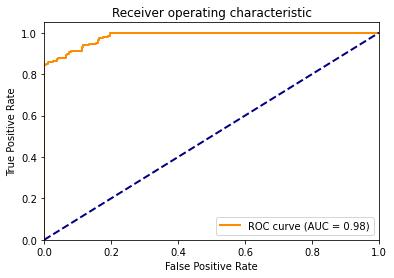

In [119]:
#ROC-CURVE for RF classification 

from sklearn.metrics import roc_curve, auc

rf_class.fit(X_train, y_class_train)

# Get predicted probabilities for each class
class_probs = rf_class.predict_proba(X_test)

# Compute false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_class_test, class_probs[:, 1])

# AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

[0.99457952 0.99522666 0.99579834 0.99588427 0.99474818 0.99586819
 0.99610182 0.99725977 0.9950887  0.99464334]


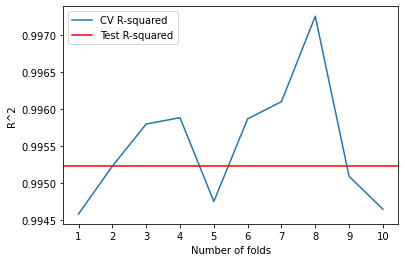

In [120]:
# Comparison between of r squared between training (cv) and test 
#plot r^2 for RF regression 
# Plot the results
print(r_squared_reg)
fig, ax = plt.subplots()
ax.plot(range(1, 11), r_squared_reg, label='CV R-squared')
ax.axhline(reg_r_squared, color='r', label='Test R-squared')
ax.set_xlabel('Number of folds')
ax.set_ylabel('R^2')
ax.set_xticks(range(1, 11))
ax.legend()
plt.show()

## Boosting - Emily

### XG BOOST - CLASSIFICAION

In [121]:
# Define X and y
# Defind kfolds for cv
X_boost_class = train_data[['S', 'K', 'tau', 'r']].values
y_boost_class = train_data['BS'].values
kfolds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 2)

### Without Tuning Parameters- With All Default - CLASSIFICATION

In [122]:
X_train,X_test,y_train,y_test=train_test_split(X_boost_class,y_boost_class,test_size=0.2,random_state=2, stratify=y_boost_class)

scores_test = []
scores_train = []
    
for train_index, test_index in kfolds.split(X_train, y_train):
    
    model = xgb.XGBClassifier()
    model.fit(X_train[train_index], y_train[train_index])

    # use fitted model to predict the in-sample and out-of-sample accuracy score
    y_pred_test = model.predict(X_train[test_index])
    y_pred_train = model.predict(X_train[train_index])

    # score for each iteration and add score into scores list
    score_test = accuracy_score(y_pred_test, y_train[test_index])
    score_train = accuracy_score(y_pred_train, y_train[train_index])
    scores_test.append(score_test)
    scores_train.append(score_train)

print(f'out of sample accuracy score:{np.round(sum(scores_test)/len(scores_test),4)}')
print(f'in sample accuracy score:{np.round(sum(scores_train)/len(scores_train),4)}')

out of sample accuracy score:0.9327
in sample accuracy score:1.0


<font size="+0.5">
<li>The in sample accuracy score of 0.9998 is much higher than the out of sample accuracy score of 0.9343, indicating an overfitting model with default hyperparameters. Therefore, we need to tune the hyperparameters such as max_depth of trees, alpha (L1 norm), and learning rate to control the model complexity and to prevent overfitting. 
</font>

### Tune Hyperparameters - CLASSIFICATION

In [123]:
# Initiate values
alphas_list = [0,0.001,0.1,0.5]
max_depths_list = [1,2,3,4,5]
learning_list = [0.05,0.1,0.3]

In [124]:
# Calcualte the accuracy score of xgboost model by examining different combination of hyperparameters 

summary = {
    "max_depth": [],
    "alpha": [],
    "learning_rate": [],
    "test_score":[],
    "train_score": []
}
max_avg_score = 0
best_depth = 0
best_alpha = 0
best_learning_rate = 0

X_train,X_test,y_train,y_test=train_test_split(X_boost_class,y_boost_class,test_size=0.2,random_state=2, stratify=y_boost_class)

for max_depth in max_depths_list:
    for alpha in alphas_list:
        for rate in learning_list:
            scores_test = []
            scores_train = []
            
            # cv=10 and tune hyperparameters of xgbclassifier model
            for train_index, test_index in kfolds.split(X_train, y_train):
                model = xgb.XGBClassifier(max_depth=max_depth, reg_alpha=alpha, learning_rate=rate, objective='binary:logistic', verbosity=0)
                model.fit(X_train[train_index], y_train[train_index])
                
                # use fitted model to predict the in-sample and out-of-sample accuracy score
                y_pred_test = model.predict(X_train[test_index])
                y_pred_train = model.predict(X_train[train_index])
                
                # score for each iteration and add score into scores list
                score_test = accuracy_score(y_pred_test, y_train[test_index])
                score_train = accuracy_score(y_pred_train, y_train[train_index])
                scores_test.append(score_test)
                scores_train.append(score_train)

            # average out-of-sample score for each combination of hyperparameters 
            max_avg_score_temp = sum(scores_test)/len(scores_test)
            # find the max out-of-sample score from combinations of hyperparameters
            if max_avg_score_temp > max_avg_score:
                max_avg_score = max_avg_score_temp
                best_depth = max_depth
                best_alpha = alpha
                best_learning_rate = rate
            
            summary["max_depth"].append(max_depth)
            summary["alpha"].append(alpha)
            summary["learning_rate"].append(rate)
            summary["test_score"].append(np.round(sum(scores_test)/len(scores_test),4))
            summary["train_score"].append(np.round(sum(scores_train)/len(scores_train),4))
            
print(summary)

{'max_depth': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], 'alpha': [0, 0, 0, 0.001, 0.001, 0.001, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 0, 0, 0, 0.001, 0.001, 0.001, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 0, 0, 0, 0.001, 0.001, 0.001, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 0, 0, 0, 0.001, 0.001, 0.001, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 0, 0, 0, 0.001, 0.001, 0.001, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5], 'learning_rate': [0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3], 'test_score': [0.9021, 0.911, 0.92, 0.9021, 0.911, 0.92, 0.9021, 0.9118, 0.9192, 0.9021, 0.914, 0.9185, 0.9215, 0.9178, 0.9282, 0.9207, 0.9185, 0.9282, 0.

In [125]:
# the best accuracy score result and its corresponding hyperparameters
print(max_avg_score)
print(best_depth)
print(best_alpha)
print(best_learning_rate)

0.934216137358321
4
0
0.3


In [126]:
# the result of different combination of hyperparameters
xgboost_classification_result = pd.DataFrame(summary)
xgboost_classification_result['Difference'] = xgboost_classification_result['train_score']-xgboost_classification_result['test_score']
xgboost_classification_result

,max_depth,alpha,learning_rate,test_score,train_score,Difference
0,1,0.000,0.05,0.9021,0.9070,0.0049
1,1,0.000,0.10,0.9110,0.9222,0.0112
2,1,0.000,0.30,0.9200,0.9327,0.0127
3,1,0.001,0.05,0.9021,0.9070,0.0049
4,1,0.001,0.10,0.9110,0.9222,0.0112
5,1,0.001,0.30,0.9200,0.9330,0.0130
6,1,0.100,0.05,0.9021,0.9070,0.0049
7,1,0.100,0.10,0.9118,0.9222,0.0104
8,1,0.100,0.30,0.9192,0.9326,0.0134
9,1,0.500,0.05,0.9021,0.9070,0.0049


/var/folders/l_/3fhtc0fs3573nw5pd7ts0_1r0000gp/T/ipykernel_13428/1876638774.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  alpha_1 = xgboost_classification_result.groupby(['alpha'])[('test_score','train_score')].mean()
/Users/sang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


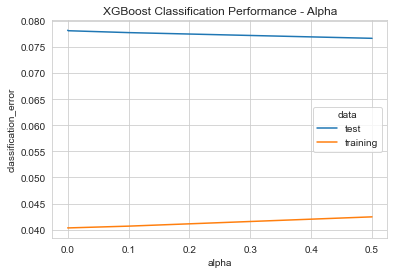

In [127]:
# Plot the relationship between each hyperparameter and accuracy score to check the optimal
import seaborn as sns
sns.set_style("whitegrid")


# alpha and classification error
alpha_1 = xgboost_classification_result.groupby(['alpha'])[('test_score','train_score')].mean()
alpha_1.reset_index(inplace=True)
alpha_1.rename(columns={"test_score":"test","train_score":"training"}, inplace=True)

data_1 = pd.melt(alpha_1,'alpha')
data_1['classification_error'] = 1-data_1['value']
data_1.rename(columns={"variable":"data"}, inplace=True)
sns.lineplot('alpha', 'classification_error', hue='data', data=data_1)
plt.title("XGBoost Classification Performance - Alpha")
plt.savefig("xg_classification_alpha")

/var/folders/l_/3fhtc0fs3573nw5pd7ts0_1r0000gp/T/ipykernel_13428/2064262818.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  learning_rate_1 = xgboost_classification_result.groupby(['learning_rate'])[('test_score','train_score')].mean()
/Users/sang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


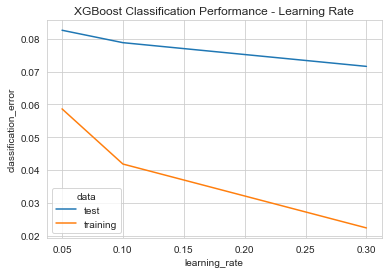

In [128]:
# learning_rate and classification error
learning_rate_1 = xgboost_classification_result.groupby(['learning_rate'])[('test_score','train_score')].mean()
learning_rate_1.reset_index(inplace=True)
learning_rate_1.rename(columns={"test_score":"test","train_score":"training"}, inplace=True)

data_2 = pd.melt(learning_rate_1,'learning_rate')
data_2['classification_error'] = 1-data_2['value']
data_2.rename(columns={"variable":"data"}, inplace=True)
sns.lineplot('learning_rate', 'classification_error', hue='data', data=data_2)
plt.title("XGBoost Classification Performance - Learning Rate")
plt.savefig("xg_classification_learning")

/var/folders/l_/3fhtc0fs3573nw5pd7ts0_1r0000gp/T/ipykernel_13428/3791086293.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  depth_1 = xgboost_classification_result.groupby(['max_depth'])[('test_score','train_score')].mean()
/Users/sang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


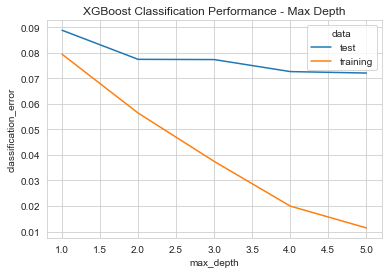

In [129]:
# max_depth and classification error
depth_1 = xgboost_classification_result.groupby(['max_depth'])[('test_score','train_score')].mean()
depth_1.reset_index(inplace=True)
depth_1.rename(columns={"test_score":"test","train_score":"training"}, inplace=True)

data_3 = pd.melt(depth_1,'max_depth')
data_3['classification_error'] = 1-data_3['value']
data_3.rename(columns={"variable":"data"}, inplace=True)
sns.lineplot('max_depth', 'classification_error', hue='data', data=data_3)

plt.title("XGBoost Classification Performance - Max Depth")
plt.savefig("xg_classification_depth")

### Final XG BOOST Model - CLASSIFICATION

In [130]:
# Use the selected parameters to create a new tree 
xgboost_classification_final = xgb.XGBClassifier(random_state=2, max_depth=best_depth, reg_alpha=best_alpha, learning_rate=best_learning_rate)

# Evaluate the accuracy of the new tree using cross-validation on all data in option_train csv
cv_scores = cross_val_score(xgboost_classification_final, X_boost_class, y_boost_class, cv=kfolds, scoring='accuracy')
print("Cross-validation accuracy with XGBoost:", np.mean(cv_scores))
print("Cross-validation classification error with XGBoost:",1-np.mean(cv_scores))

Cross-validation accuracy with XGBoost: 0.9342564870259482
Cross-validation classification error with XGBoost: 0.06574351297405179


In [131]:
models_classification = pd.concat([models_classification, pd.DataFrame(1-cv_scores, columns=['XGBoost'])], axis=1)
models_classification

,Logistic Regression,Linear Discriminant Analysis,K Nearest Neighbors,Decision Tree,Random Forest,XGBoost
0,0.071429,0.071429,0.089552,0.077381,0.095238,0.065476
1,0.095238,0.095238,0.077612,0.113095,0.077381,0.071429
2,0.089286,0.095238,0.068657,0.065476,0.053571,0.071429
3,0.095808,0.101796,0.047904,0.065868,0.047904,0.077844
4,0.071856,0.071856,0.071856,0.089820,0.053892,0.053892
5,0.101796,0.101796,NaN,0.053892,0.047904,0.053892
6,0.101796,0.089820,NaN,0.101796,0.047904,0.065868
7,0.095808,0.101796,NaN,0.065868,0.077844,0.053892
8,0.047904,0.047904,NaN,0.113772,0.059880,0.083832
9,0.089820,0.089820,NaN,0.083832,0.089820,0.059880


### XGBOOST - REGRESSION

In [132]:
# Define X and y
X_boost_reg = train_data[['S', 'K', 'tau', 'r']].values
y_boost_reg = train_data['Value'].values
X_train, X_test, y_train, y_test = train_test_split(X_boost_reg, y_boost_reg, test_size=0.2, random_state=2)

# Initiate values
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 2)
alphas_list = [0,0.001,0.1,0.5]
max_depths_list = [1,2,3,4,5]
learning_list = [0.05,0.1,0.3]

summary_reg = {
    "max_depth": [],
    "alpha": [],
    "learning_rate": [],
    "out_sample_r":[],
    "in_sample_r": []
}
max_out_sample_r = 0
best_depth = 0
best_alpha = 0
best_learning_rate = 0

# try combinations of hyperparameters 
for max_depth in max_depths_list:
    for alpha in alphas_list:
        for rate in learning_list:
            in_sample_r_reg = []
            out_sample_r_reg = []
            
            # cv=10 and tune hyperparameters of XGBRegressor model
            for train_index, test_index in kfolds.split(X_train, y_train):
                model_reg = xgb.XGBRegressor(max_depth=max_depth, reg_alpha=alpha, learning_rate=rate, objective='reg:squarederror', verbosity=0)
                model_reg.fit(X_train[train_index], y_train[train_index])
                
                # use fitted model to predict the in-sample and out-of-sample r square score
                in_sample_r = model_reg.score(X_train[train_index], y_train[train_index])
                out_sample_r = model_reg.score(X_train[test_index], y_train[test_index])

                # calculate r-squared for each iteration and add into lists
                out_sample_r_reg.append(out_sample_r)
                in_sample_r_reg.append(in_sample_r)

            # average out-of-sample r-sq for each combination of hyperparameters 
            max_out_sample_r_temp = sum(out_sample_r_reg)/len(out_sample_r_reg)
            # find the max out-of-sample r-sq from combinations of hyperparameters
            if max_out_sample_r_temp > max_out_sample_r:
                max_out_sample_r = max_out_sample_r_temp
                best_depth = max_depth
                best_alpha = alpha
                best_learning_rate = rate
            
            summary_reg["max_depth"].append(max_depth)
            summary_reg["alpha"].append(alpha)
            summary_reg["learning_rate"].append(rate)
            summary_reg["out_sample_r"].append(np.round(sum(out_sample_r_reg)/len(out_sample_r_reg),4))
            summary_reg["in_sample_r"].append(np.round(sum(in_sample_r_reg)/len(in_sample_r_reg),4))
            
print(summary_reg)

{'max_depth': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], 'alpha': [0, 0, 0, 0.001, 0.001, 0.001, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 0, 0, 0, 0.001, 0.001, 0.001, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 0, 0, 0, 0.001, 0.001, 0.001, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 0, 0, 0, 0.001, 0.001, 0.001, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 0, 0, 0, 0.001, 0.001, 0.001, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5], 'learning_rate': [0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3, 0.05, 0.1, 0.3], 'out_sample_r': [0.9051, 0.9498, 0.9677, 0.9051, 0.9498, 0.9677, 0.9051, 0.9498, 0.9678, 0.905, 0.9497, 0.9678, 0.9721, 0.9901, 0.9959, 0.9721, 0.9901, 0.

In [133]:
# the best out of sample r square result and its corresponding hyperparameters
print(max_out_sample_r)
print(best_depth)
print(best_alpha)
print(best_learning_rate)

0.9981466422280066
5
0.5
0.3


In [134]:
# the result of different combination of hyperparameters
xgboost_regression_result = pd.DataFrame(summary_reg)
xgboost_regression_result['Difference']=xgboost_regression_result['in_sample_r']-xgboost_regression_result['out_sample_r']
xgboost_regression_result

,max_depth,alpha,learning_rate,out_sample_r,in_sample_r,Difference
0,1,0.000,0.05,0.9051,0.9086,0.0035
1,1,0.000,0.10,0.9498,0.9531,0.0033
2,1,0.000,0.30,0.9677,0.9721,0.0044
3,1,0.001,0.05,0.9051,0.9086,0.0035
4,1,0.001,0.10,0.9498,0.9531,0.0033
5,1,0.001,0.30,0.9677,0.9721,0.0044
6,1,0.100,0.05,0.9051,0.9086,0.0035
7,1,0.100,0.10,0.9498,0.9531,0.0033
8,1,0.100,0.30,0.9678,0.9721,0.0043
9,1,0.500,0.05,0.9050,0.9085,0.0035


### Final XGBOOST Model - REGRESSION

In [135]:
# Use the selected parameters to create a new tree 
xgboost_regression_final = xgb.XGBRegressor(random_state=2, max_depth=best_depth, reg_alpha=best_alpha, learning_rate=best_learning_rate)

# Evaluate the accuracy of the new tree using cross-validation on all data in option_train csv
cv_r_squared = cross_val_score(xgboost_regression_final, X_boost_reg, y_boost_reg, cv=kfolds, scoring = 'r2')
print("Cross-validation r-squared with XGBoost Regression:", np.mean(cv_r_squared))

Cross-validation r-squared with XGBoost Regression: 0.9981625890429034


In [136]:
models_regression = pd.concat([models_regression, pd.DataFrame(cv_r_squared, columns=['XGBoost'])], axis=1)
models_regression

,Linear Regression,K Nearest Neighbors,Decision Tree,Random Forest,XGBoost
0,0.904298,0.975840,0.992563,0.995191,0.997076
1,0.923114,0.986635,0.993920,0.996825,0.998488
2,0.915912,0.983151,0.991941,0.996809,0.997598
3,0.909624,0.986926,0.991475,0.995841,0.998267
4,0.915089,0.978338,0.993501,0.996873,0.998736
5,0.912409,0.975764,0.991837,0.996710,0.998287
6,0.907232,0.983724,0.992557,0.996845,0.998189
7,0.910531,0.982250,0.990201,0.995620,0.998077
8,0.918869,0.985449,0.990646,0.996676,0.998642
9,0.886749,0.975348,0.993015,0.996844,0.998265


# Models Comparison

In [137]:
# Compare classification models using chart 
# 10 folds CV classification errors
models_classification

,Logistic Regression,Linear Discriminant Analysis,K Nearest Neighbors,Decision Tree,Random Forest,XGBoost
0,0.071429,0.071429,0.089552,0.077381,0.095238,0.065476
1,0.095238,0.095238,0.077612,0.113095,0.077381,0.071429
2,0.089286,0.095238,0.068657,0.065476,0.053571,0.071429
3,0.095808,0.101796,0.047904,0.065868,0.047904,0.077844
4,0.071856,0.071856,0.071856,0.089820,0.053892,0.053892
5,0.101796,0.101796,NaN,0.053892,0.047904,0.053892
6,0.101796,0.089820,NaN,0.101796,0.047904,0.065868
7,0.095808,0.101796,NaN,0.065868,0.077844,0.053892
8,0.047904,0.047904,NaN,0.113772,0.059880,0.083832
9,0.089820,0.089820,NaN,0.083832,0.089820,0.059880


In [138]:
# Compare regression models using chart 
# 10 folds CV r-squared
models_regression

,Linear Regression,K Nearest Neighbors,Decision Tree,Random Forest,XGBoost
0,0.904298,0.975840,0.992563,0.995191,0.997076
1,0.923114,0.986635,0.993920,0.996825,0.998488
2,0.915912,0.983151,0.991941,0.996809,0.997598
3,0.909624,0.986926,0.991475,0.995841,0.998267
4,0.915089,0.978338,0.993501,0.996873,0.998736
5,0.912409,0.975764,0.991837,0.996710,0.998287
6,0.907232,0.983724,0.992557,0.996845,0.998189
7,0.910531,0.982250,0.990201,0.995620,0.998077
8,0.918869,0.985449,0.990646,0.996676,0.998642
9,0.886749,0.975348,0.993015,0.996844,0.998265


In [139]:
models_mean_cla = pd.DataFrame(models_classification.mean(), columns=['classification_error'])
models_mean_cla

,classification_error
Logistic Regression,0.086074
Linear Discriminant Analysis,0.086670
K Nearest Neighbors,0.071116
Decision Tree,0.083080
Random Forest,0.065134
XGBoost,0.065744


In [140]:
# find the best model for classificaton - Random Forest 
models_mean_cla[models_mean_cla['classification_error']==models_mean_cla['classification_error'].min()]

,classification_error
Random Forest,0.065134


In [141]:
modes_mean_reg = pd.DataFrame(models_regression.mean(), columns=['r-squared'])
modes_mean_reg

,r-squared
Linear Regression,0.910383
K Nearest Neighbors,0.981343
Decision Tree,0.992165
Random Forest,0.996423
XGBoost,0.998163


In [142]:
# find the best model for regression - XGBoost
modes_mean_reg[modes_mean_reg['r-squared']==modes_mean_reg['r-squared'].max()]

,r-squared
XGBoost,0.998163


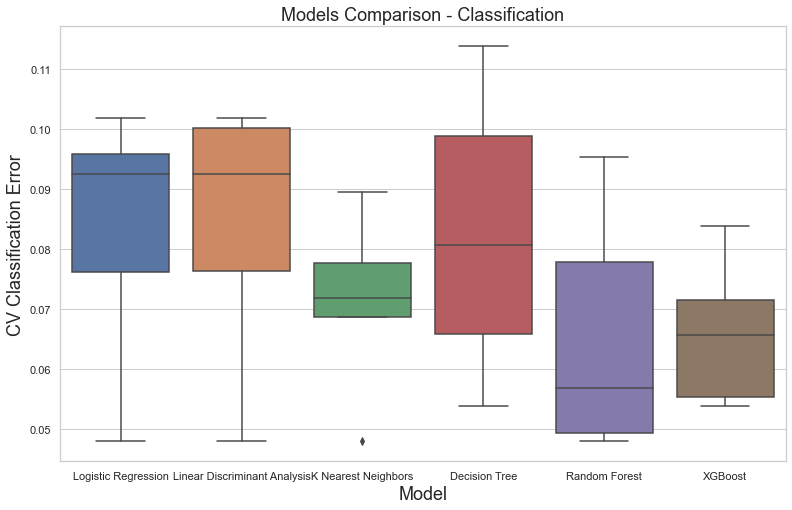

In [143]:
# Plot to compare different classification models
models_classification_melt = pd.melt(models_classification, var_name='Model')
models_classification_melt.rename(columns={"value":"CV_Classification_Error"}, inplace=True)
plt.figure(figsize=(13,8))
sns.set(style="whitegrid")
sns.boxplot(x='Model', y='CV_Classification_Error',data=models_classification_melt)
plt.title('Models Comparison - Classification', fontsize=18)
plt.xlabel('Model', fontsize=18);
plt.ylabel('CV Classification Error', fontsize=18);
plt.savefig('models_cla.png')

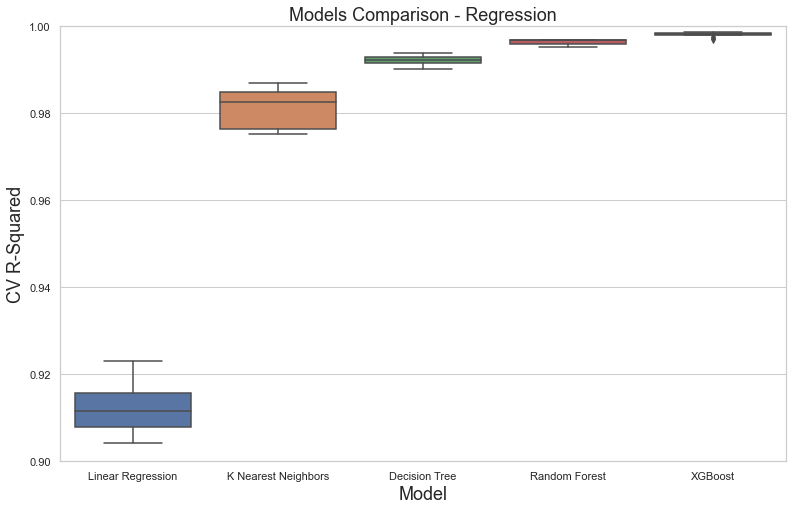

In [144]:
# Plot to compare different regression models
models_regression_melt = pd.melt(models_regression, var_name='Model')
models_regression_melt.rename(columns={"value":"CV_R"}, inplace=True)
plt.figure(figsize=(13,8))
sns.set(style="whitegrid")
plt.ylim(0.90,1)
sns.boxplot(x='Model', y='CV_R',data=models_regression_melt)
plt.title('Models Comparison - Regression', fontsize=18)
plt.xlabel('Model', fontsize=18);
plt.ylabel('CV R-Squared', fontsize=18);
plt.savefig('models_reg.png')

# Testing Data

In [145]:
test_data = pd.read_csv('option_test_wolabel.csv')

In [146]:
test_data

,S,K,tau,r
0,431.618600,460,0.293651,0.03147
1,432.633296,420,0.182540,0.03147
2,432.633296,430,0.182540,0.03147
3,431.618600,415,0.293651,0.03147
4,434.772855,420,0.043651,0.03147
...,...,...,...,...
1115,440.067417,435,0.182540,0.02962
1116,439.081203,485,0.293651,0.02962
1117,439.081203,475,0.293651,0.02962
1118,442.490015,420,0.043651,0.02962


In [147]:
test_data.count()

S      1120
K      1120
tau    1120
r      1120
dtype: int64

In [148]:
test_data.isna().sum()

S      0
K      0
tau    0
r      0
dtype: int64

In [149]:
test_data.describe(include='all')

,S,K,tau,r
count,1120.000000,1120.000000,1120.000000,1120.000000
mean,441.110753,440.406250,0.203589,0.030223
std,7.630218,23.788616,0.103300,0.000542
min,425.472331,375.000000,0.003968,0.029510
25%,433.734305,420.000000,0.115079,0.029820
50%,443.411426,440.000000,0.206349,0.030130
75%,447.350699,460.000000,0.285714,0.030440
max,455.880619,500.000000,0.392857,0.031880


In [150]:
train_data

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,0
1,0.125000,427.015526,465.0,0.166667,0.03126,1
2,20.691244,427.762336,415.0,0.265873,0.03116,0
3,1.035002,451.711658,460.0,0.063492,0.02972,1
4,39.553020,446.718974,410.0,0.166667,0.02962,0
...,...,...,...,...,...,...
1668,1.470000,444.397163,475.0,0.273810,0.03034,1
1669,34.927317,438.453825,410.0,0.301587,0.02972,0
1670,41.127997,428.042219,390.0,0.170635,0.03188,0
1671,0.440003,439.081203,480.0,0.293651,0.02962,1


In [151]:
# train dataest
X_train = train_data.iloc[:,1:5]

# random forest regression(Value C) train data
y_reg_train = train_data.iloc[:,0]

# random forest classification(BS) train data
y_class_train = train_data.iloc[:,5]

# test data
X_test = test_data

In [152]:
# fit RF regression on the training set with best parameters
rf_reg = RandomForestRegressor(n_estimators=300, max_depth=20, min_samples_leaf = 1, min_samples_split=2, random_state=2)
rf_reg.fit(X_train, y_reg_train)
y_reg_pred = rf_reg.predict(X_test)

# fit RF classification on the training set with best parameters 
rf_class = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_leaf = 2, min_samples_split=2, random_state=2)
rf_class.fit(X_train, y_class_train)
y_class_pred = rf_class.predict(X_test)

# Create a dataframe with the predicted values
prediction_df = pd.DataFrame({'Value': y_reg_pred, 'BS': y_class_pred})

# Save the dataframe as a CSV file
prediction_df.to_csv('group_23_prediction.csv', index=False)

# Print the first few rows of the dataframe
print(prediction_df.head())


       Value  BS
0   1.292634   1
1  17.686913   0
2  10.227864   0
3  22.215361   0
4  15.510866   0
